# Manifold Learning Methods

## MNIST Digits

Use data form https://www.kaggle.com/c/digit-recognizer/data and suppose that files test.csv and train.csv are in same folder as notebook. You can use subsamples to spead up your calculations.

In [42]:
%matplotlib inline
# %matplotlib notebook 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as rand
from sklearn import manifold

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11         9       0       0       0    

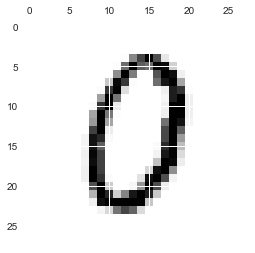

In [43]:
# (1 point) load train data, save class labels, plot first point as a digit
train_data = pd.read_csv('train.csv')
train_data.head()
print(train_data)
color = train_data['label'][:3000]
small_train_data = train_data.groupby('label').head(300).reset_index(drop=True)
small_train_data = small_train_data.drop('label',axis = 1)
print('Number of objects = ', small_train_data.shape[0])
print('Number of features = ',small_train_data.shape[1])
print(small_train_data)
plt.matshow(small_train_data.iloc[5].values.reshape(28, 28))
plt.show()
n_neighbors = 10
n_components = 2

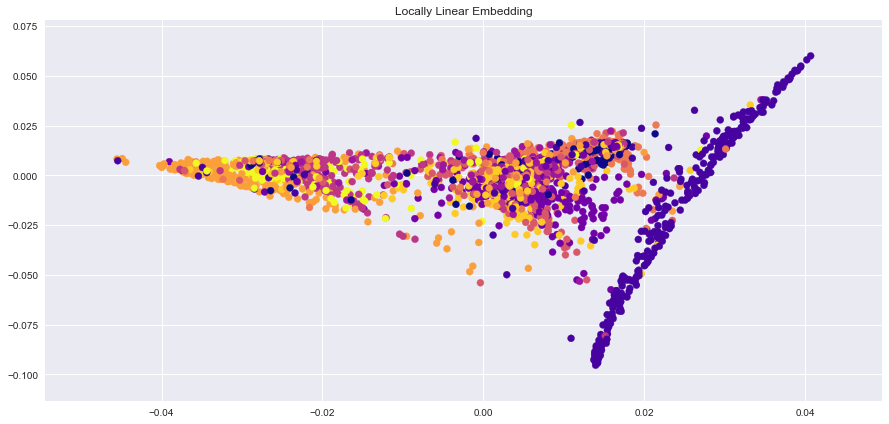

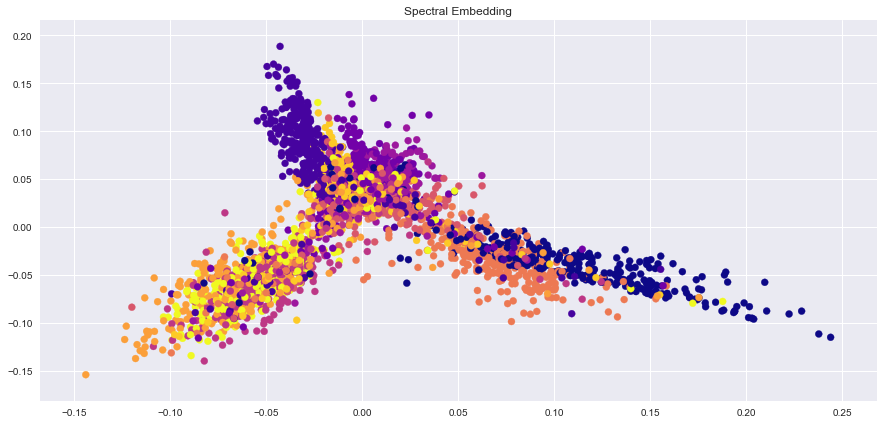

In [45]:
# Apply Isomap, Locally Linear Embedding, Spectral Embedding, Local Tangent Space Alignment, Multi-dimensional Scaling, t-distributed Stochastic Neighbor Embedding
# (5 points) apply methods to reduce dimension to two

#Locally Linear Embedding
f, axarr = plt.subplots(1, 1,figsize=(15,7))
transformed = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', method = 'standard').fit_transform(small_train_data)
axarr.scatter(transformed[:, 0], transformed[:, 1], c = color, cmap='plasma')
axarr.set_title('Locally Linear Embedding')

#Spectral Embedding
f, axarr = plt.subplots(1, 1,figsize=(15,7))
transformed = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors).fit_transform(small_train_data)
axarr.scatter(transformed[:, 0], transformed[:, 1], c = color, cmap='plasma')
axarr.set_title('Spectral Embedding')

# (3 points) plot results where the different digits are represented with different styles/colors
# (1 point) apply Out-of-Sample Isomap to an arbitrary point
# (1 point) make a conclusion

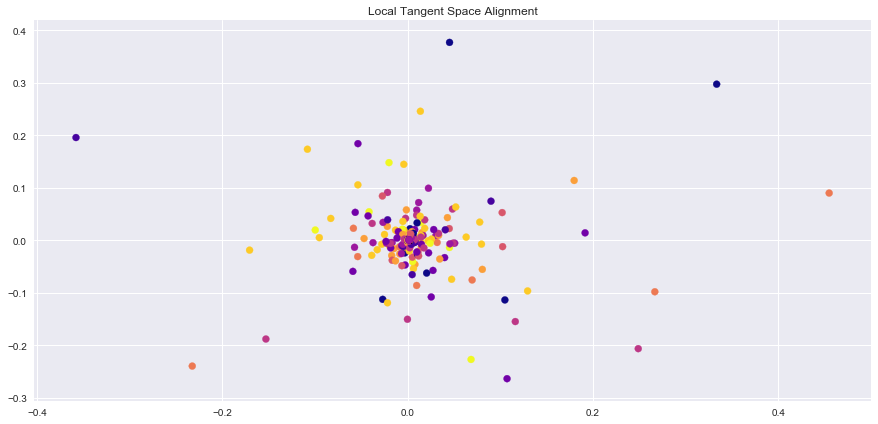

In [7]:
#Local Tangent Space Alignment
f, axarr = plt.subplots(1, 1,figsize=(15,7))
ltsa = manifold.LocallyLinearEmbedding(n_neighbors= 5 , n_components=2,
                                                     method='ltsa', eigen_solver='dense')

transformed = ltsa.fit_transform(small_train_data)



axarr.scatter(transformed[:, 0], transformed[:, 1], c = color, cmap='plasma')
axarr.set_title('Local Tangent Space Alignment')

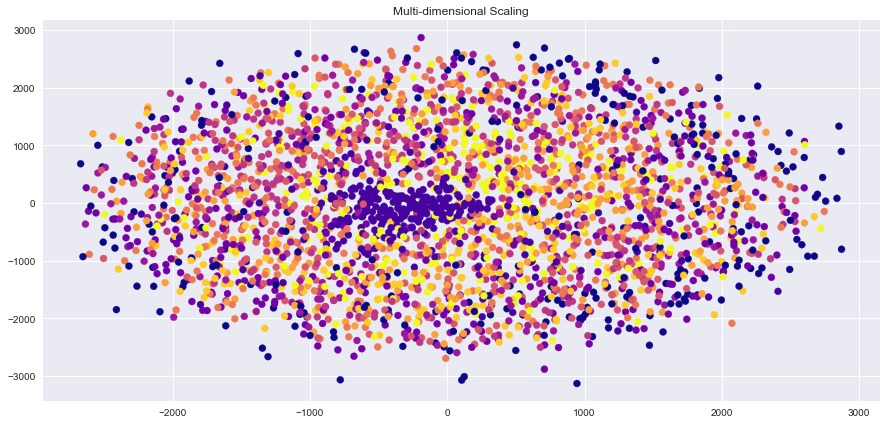

In [5]:
#Multi-dimensional Scaling
f, axarr = plt.subplots(1, 1,figsize=(15,7))
transformed = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(small_train_data)
axarr.scatter(transformed[:, 0], transformed[:, 1], c = color, cmap='plasma')
axarr.set_title('Multi-dimensional Scaling')

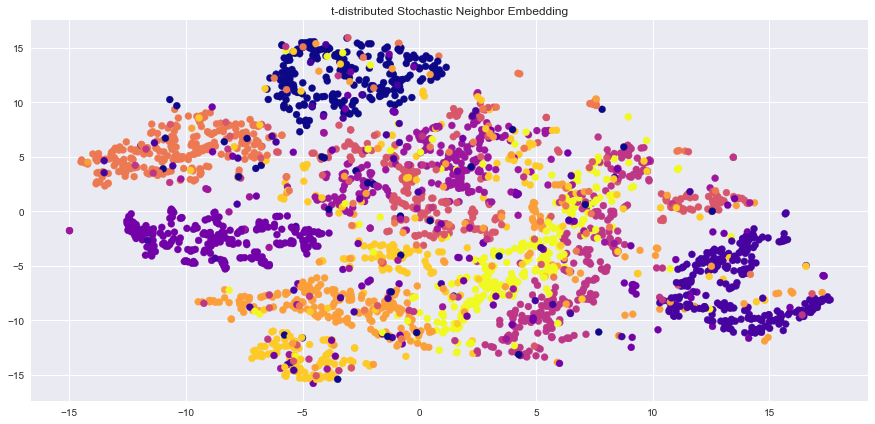

In [8]:
#t-distributed Stochastic Neighbor Embedding
f, axarr = plt.subplots(1, 1,figsize=(15,7))
transformed =  manifold.TSNE(n_components=n_components, random_state=1).fit_transform(small_train_data)
axarr.scatter(transformed[:, 0], transformed[:, 1], c = color, cmap='plasma')
axarr.set_title('t-distributed Stochastic Neighbor Embedding')

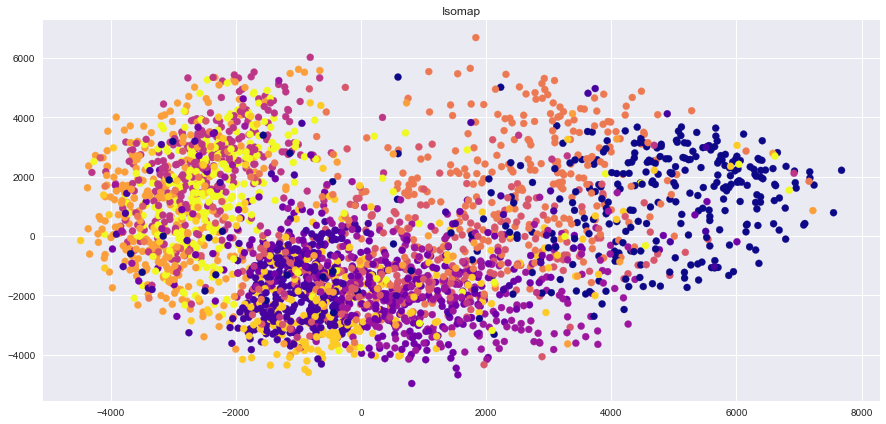

In [21]:
#Isomap
f, axarr = plt.subplots(figsize=(15,7))
transformed = manifold.Isomap(n_neighbors, n_components).fit_transform(small_train_data)
axarr.scatter(transformed[:, 0], transformed[:, 1], c = color, cmap='plasma')
axarr.set_title('Isomap')

8


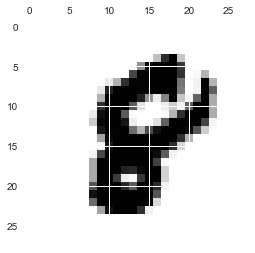

In [39]:
# (1 point) apply Out-of-Sample Isomap to an arbitrary point
arbitrary_point = train_data.iloc[3009, 1:]
value_arbitrary_point = train_data.iloc[3009, 0]
print(value_arbitrary_point)
plt.matshow(arbitrary_point.values.reshape(28, 28))
n_neighbors = 1

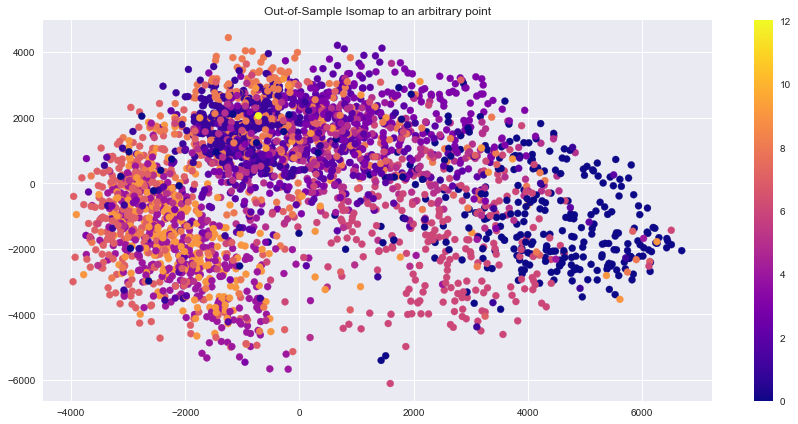

In [37]:
transformed_arbitrary_point = arbitrary_point
original_arbitrary_point = np.vstack((small_train_data, transformed_arbitrary_point))
transformed_arbitrary_point = manifold.Isomap(n_neighbors = 15, n_components = 2).fit_transform(original_arbitrary_point)
color = np.array(color)
new_color = np.hstack((color, np.array([12])))
f, axarr = plt.subplots(figsize=(15,7))
plt.scatter(transformed_arbitrary_point[:, 0], transformed_arbitrary_point[:, 1], c=new_color, cmap='plasma')
plt.colorbar()
axarr.set_title('Out-of-Sample Isomap to an arbitrary point')
#Видно, что наша новая точка находится недалеко от таких же цифр 8 ораньжевого цвета.

# Make a conclusion
Из всех рассмотренных алгоритмов можно выделить лучший, это t-distributed Stochastic Neighbor Embedding. Остальные методы тоже хорошо работают, также Isomap довольно хорошо справляется с поставленной задачей. Так как все алгоритмы работают медленно, то пришлось сокращать выборку. Более того можно сделать вывод, что при помощи t-distributed Stochastic Neighbor Embedding можно эффективно снижать размерность даже на таких многомерных данных и рассматривать их на 2d плоскости.